# Lab 19: Dimensionality Reduction 

In this lab, we will walk through two examples that use Principal Component Analysis (PCA): one involving a dataset of [iris plants](https://en.wikipedia.org/wiki/Iris_plant), and another involving an artificial "surfboard" 3D dataset.

In [29]:
# Run this cell to set up your notebook
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

plt.style.use('fivethirtyeight') # Use plt.style.available to see more styles
sns.set()
sns.set_context("talk")
%matplotlib inline

<br/>

In lecture, we discussed how Principal Component Analysis (PCA) can be used for dimensionality reduction. Specifically, given a high dimensional dataset, PCA allows us to:
1. Understand the rank of the data. If $k$ principal components capture almost all of the variance, then the data is roughly rank $k$.
2. Create 2D scatterplots of the data. Such plots are a rank 2 representation of our data, and allow us to visually identify clusters of similar observations.

In this lab, you'll learn how to perform PCA using `scikit-learn` and hopefully you'll also build a geometric intuition of PCA along the way.

<br/>

# Part 1: The Iris Dataset

To begin, run the following cell to load the dataset into this notebook. 
* `iris_features` will contain a numpy array of 4 attributes for 150 different plants (shape `150 x 4`). 
* `iris_target` will contain the class of each plant. There are 3 classes of plants in the dataset: Iris-Setosa, Iris-Versicolour, and Iris-Virginica. The class names will be stored in `iris_target_names`.
* `iris_feature_names` will be a list of 4 names, one for each attribute in `iris_features`. 

In [30]:
# just run this cell

from sklearn.datasets import load_iris
iris_data = load_iris() # Loading the dataset

# Unpacking the data into arrays
iris_features = iris_data['data']
iris_target = iris_data['target']
iris_feature_names = iris_data['feature_names']
iris_target_names = iris_data['target_names']

# Convert iris_target to string labels instead of int labels currently (0, 1, 2) for the classes
iris_target = iris_target_names[iris_target]

Let's explore the data by creating a scatter matrix of our iris features. To do this, we'll create 2D scatter plots for every possible pair of our four features. This should result in six total scatter plots in our scatter matrix with the classes labeled in distinct colors for each plot.

## Question 1: Standardization

To apply PCA, we will first need to center the data so that the mean of each feature is 1. We will go further and create **standardized** features, where we scale features such that they are centered with standard deviation 1. 

You'll do this just like in the last lab. (**Hint:** `from sklearn.preprocessing import StandardScaler`)

In [31]:
from sklearn.preprocessing import StandardScaler
iris_standardized = StandardScaler().fit_transform(iris_features)

## Question 2


Let's apply PCA to derive the first two principal components. Our goal is to see what a 2D version of the iris data looks like.

**Hints:** 
* `from sklearn.decomposition import PCA`
* `PCA(n_components=___)` For details, see https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* `.fit_transform` is awesome

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
iris_2d = pca.fit_transform(iris_standardized)

<br/><br/>

Now, run the cell below to create the scatter plot of our 2D version of the iris data, `iris_2d`.

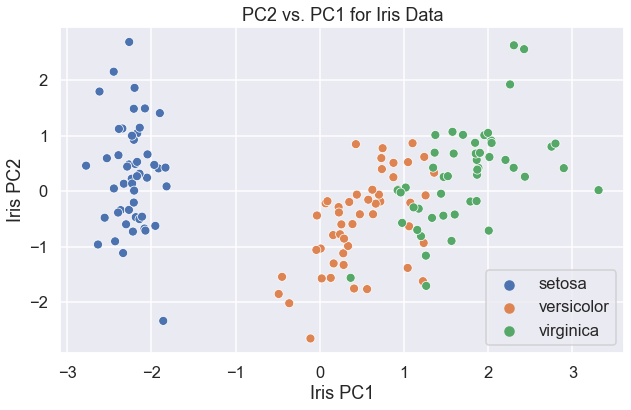

In [33]:
# just run this cell
plt.figure(figsize = (9, 6))
plt.title("PC2 vs. PC1 for Iris Data")
plt.xlabel("Iris PC1")
plt.ylabel("Iris PC2")
sns.scatterplot(x = iris_2d[:, 0], y = iris_2d[:, 1], hue = iris_target);

<br/><br/>

---

### Question 2a

What do you observe about the plot above? If you were given a point in the subspace defined by PC1 and PC2, how well would you be able to classify the point as one of the three Iris types?

<!--
BEGIN QUESTION
name: q2b
-->

_Type your answer here, replacing this text._

<br/><br/>

---
### Question 2c

What proportion of the total variance is accounted for when we project the iris data down to two dimensions? Store the result in `iris_2d_variance`.

In [34]:
iris_2d_variance = pca.explained_variance_ratio_
iris_2d_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

Quite neatly, most of the variance in the data is explained by the two-dimensional projection!

<br/><br/>
<hr style="border: 1px solid #fdb515;" />

## Question 3

As a last step, we will create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) to visualize the weight of each principal component. In the cell below, create a scree plot by creating a line plot of the component scores (variance captured by each principal component) vs. the principal component number (1st, 2nd, 3rd, or 4th). Your graph should match the image below:

*Hint:* Be sure to label your axes appropriately! You may find `plt.xticks()` ([documentation](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.xticks.html)) helpful for formatting.

<img src="images/scree.png" width="400px" />

<!--
BEGIN QUESTION
name: q3
-->

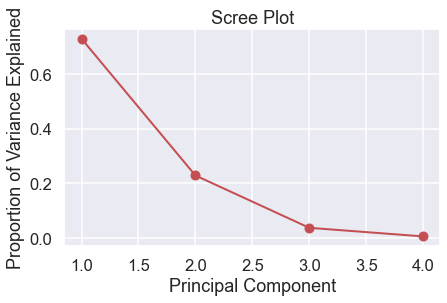

In [35]:
# your plot here
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, iris_2d_variance, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

<br/><br/>


# Part 2: Kaggle Digit Recognition

Your goal is to attempt the following challenge: https://www.kaggle.com/competitions/digit-recognizer
Here is your guided tour using the techniques you've seen so far: https://www.kaggle.com/code/abhikuks/pca-step-by-step-demo-for-beginners

**Action Items:** Nothing to hand in for this part. Just make sure you understand and can execute the techniques used in the demo.

# Congratulations! You finished the lab!

Please hand in your notebook to Canvas.